## Machine Learning and prediction
Elements of Data Science   
In this laboratory we will use training data to predict outcomes. We will first test these ideas using our Old Faithful data again. Next we will look at data on the iris flower to classify iris' based on sepal width and length. In our culminating activity we will predict molecular acidity using data computed by [Prof. Vince Voelz](http://www.voelzlab.org) in the Temple Chemistry department and a graduate student, Robert Raddi. See their paper: [Stacking Gaussian processes to improve pKa predictions in the SAMPL7 challenge](https://link.springer.com/epdf/10.1007/s10822-021-00411-8?sharing_token=yLV8dMXdxg40M_Ds_2Rhsfe4RwlQNchNByi7wbcMAY6fCl3bMLQiAhJzS2zZw-SwUkz490heLLZu1bPJ8T5LHXo1WvZkp0AJmWzXo71rszl8UaPxjqtqR-oARfxWGrTiCV0rNXy0C7IVzX6yoMYTPv2ZJfnQS-zF1pYvL8ESsUI%3D).

In [159]:
Your_name = '...'

### Learning from training data
A key concept in machine learning is using a subset of a dataset to train an algorithm to make estimates on a separate set of test data. The quality of the machine learning and algorithm can be assesed based on the accuracy of the predictions made on test data. Many times there are also parameters sometimes termed hyper-parameters which can be optimized through an iterative approach on test or validation data. In practice a dataset is randomly split into training and test sets using sampling. 
### k nearest neighbor
We will examine one machine learning algorithm in the laboratory, k nearest neighbor. Many of the concepts are applicable to the broad range of machine learning algorithms available.

In [3]:
## import statements
# These lines load the tests. 
from gofer.ok import check

import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore', UserWarning)
#from IPython.display import Image
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
# Fix for datascience collections Iterable
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable
#!pip install jupyterquiz
from jupyterquiz import display_quiz
import json
from IPython.core.display import HTML

### k nearest  neighbor regression
We will use the k nearest neighbor algorithm to make predictions of wait time in minutes following an eruption duration ofa given number of minutes (independent variable).


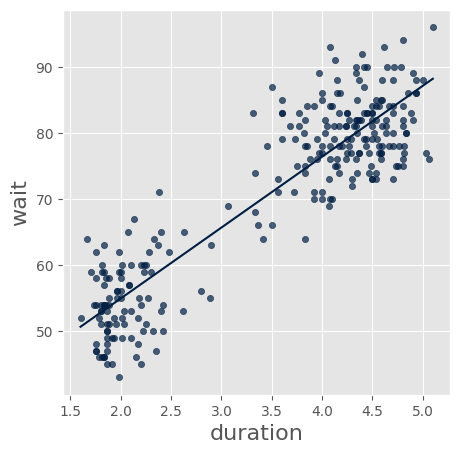

In [4]:
faithful = Table.read_table("data/faithful.csv")
faithful.scatter(0, 1, fit_line=True)

#### *Question 1* 
Use the datascience .split(n) Table method to split the dataset into 80% training and 20% test. The argument for .split(n) method,n, needs to be an integer. [See datascience documentation](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.split.html#datascience.tables.Table.split)

In [11]:
trainf, testf = faithful.split(int(faithful.num_rows*0.8))
print(trainf.num_rows, 'training and', testf.num_rows, 'test instances.')

217 training and 55 test instances.


In [10]:
faithful.num_rows

272

In [12]:
check('tests/q1.py')

### Nearest neighbor concept
The training examines the chreacteristics of *k* nearest neighbors to the data point for which a prediction will be made. Nearness is measured using several different [metrics](https://www.nhm.uio.no/english/research/infrastructure/past/help/similarity.html) with Euclidean distance being a common one for numerical attributes.  
Euclidean distance:   
1-D $$ d(p,q) = \sqrt{(p-q)^{2}} $$   
 2-D $$ d(p,q) = \sqrt{(p_1-q_1)^{2}+(p_2-q_2)^{2}} $$
 
 For multiple points (rows):
 2-D $$ d(p,q) = \sum{{\sqrt{((p_1-q_1)^{2}+(p_2-q_2)^{2}}}} $$

###### Try different attribute values in the following 2D Euclidean distance example code below to get a feel for the computation

In [13]:
# Example code to compute an Euclidean distance between two 2-D points
d_p_q = np.sqrt(sum((make_array(2,3)-make_array(4,3))**2))
d_p_q

2.0

To get values from Table row as an array as is done in row_distance. Note in the faithful data case we will only consider the duration column in nearest neighbor computation but in examples below we will use a 2-D array of attributes with the iris data and a 10-D array in the chemistry and molecular acidity case.

In [14]:
f_array = np.array(faithful.row(0))
f_array

array([  3.6,  79. ])

#### A couple quick review questions about nearest neighbor below, select the best answer (multiple tries ok). Execute the below cell to reveal the self-check quiz.

In [15]:
with open("questions.json", "r") as file:
    questions=json.load(file)    
display_quiz(questions)

<IPython.core.display.Javascript object>

#### *Question 2* 
Define a function which is the Euclidean distance between two values. Use the last two example code cells above as inspiration. This is where we will compute the distance between two *duration* values.

In [62]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    #print(pt1, pt2)
    return np.sqrt(sum((pt1-pt2)**2))

In [17]:
check('tests/q2.py')

#### Rest of the nearest neighbor algorithm
Execute these cells to create the complete algorithm

In [59]:
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

#### *Question 3*
Take an example row from the test data (testf), drop the prediction column and use the closest function to see the top 10 closest points to the target in the training data. 

In [19]:
example_row = testf.row(14)
example_row   # This should display data contained in selected row in testf table.

Row(duration=2.0, wait=58.0)

In [21]:
k = 7 # Number of nearest neighbors
closest(trainf, example_row, k,'wait')

duration,wait,Distance
5.1,96,52.9908
5.033,77,53.0538
5,88,53.0848
4.933,88,53.148
4.933,86,53.148
4.9,89,53.1791
4.883,83,53.1952


In [22]:
check('tests/q3.py')

#### *Question 4*
Predict the value for this row using the defined predict_nn function below and compare to the value reported for wait in the test data. How do they compare?

In [24]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    k = 10
    return np.average(closest(trainf, example, k , 'wait').column('wait'))

In [29]:
predictionf = predict_nn(example_row) # This is the value predicted for wait using the average of the k nearest neighbors in the test set
actual = example_row[1]
print(predictionf,actual)

85.1 58.0


<font color='blue'> Answer here  </font>
***  

In [30]:
check('tests/q4.py')

#### *Question 5* Predictions
Now we will make predictions for the whole data set using the apply Table method. We will then look at the root mean squared error (RMSE) for the nearest neighbor fit and a scatter plot. Try adjusting the value of k in the predict_nn function to see it's effect on the quality of fit by rerunning these cells. Are the predicted points in a **perfect** straight line, why or why not?

In [31]:
testf = testf.with_columns("predict",testf.apply(predict_nn,"duration"))
nn_test_predictions = testf.column("predict")
test_wait = testf.column("wait")
rmse_nn = np.mean((test_wait - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for nearest neighbor regression:', round(rmse_nn,2))

Test set RMSE for nearest neighbor regression: 6.42


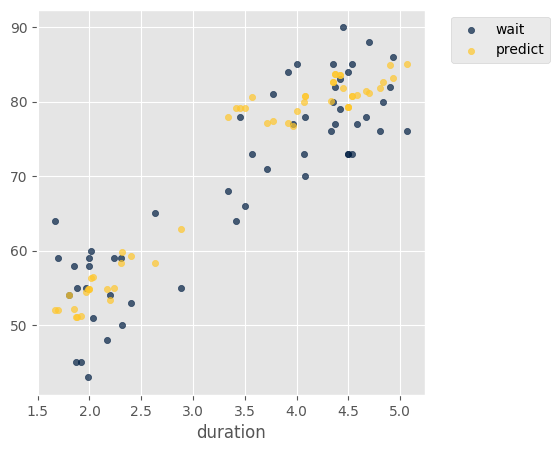

In [32]:
testf.scatter("duration")

<font color='blue'> Answer here  </font>
***  

### Classify iris data with machine learning
Next we will take on the problem of classifying iris data into three categories, setosa, versicolor, and virginica. Here we will also learn the basics of the k nearest neighbor algorithm.

The first data set we will look at consists of 50 samples from three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured including the length and the width of the sepals and petals, in centimeters for each observation.
<br><center><img src='iris.png' width=150 height=150><br>Iris stainglass, J.R. Smith</center>

In [33]:
n_neighbors = 15
# Load iris data
iris = datasets.load_iris()
# We only take the first two features. 
iris_table = Table().with_columns("Name",iris.target,iris.feature_names[0],iris.data[:,0],iris.feature_names[1],iris.data[:,1])
iris_table

Name,sepal length (cm),sepal width (cm)
0,5.1,3.5
0,4.9,3
0,4.7,3.2
0,4.6,3.1
0,5,3.6
0,5.4,3.9
0,4.6,3.4
0,5,3.4
0,4.4,2.9
0,4.9,3.1


In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

#### *Question 6*
Train and test split the iris_table @ 80% as above.

In [36]:
train_i, test_i = iris_table.split(int(iris_table.num_rows * 0.8))
print(train_i.num_rows, 'training and', test_i.num_rows, 'test instances.')

120 training and 30 test instances.


In [37]:
check('tests/q6.py')

#### *Question 7* 
With classification we need to use training data to decide how to classify data given a set of attributes, sepal length and sepal width in this case. Create a function which returns the majority classification among three possibilities in "Name" coded as 0, 1, 2 (setosa, versicolor, and virginica respectively). The `and` below combines two conditionals. For example,  (twos > ones) and ...

In [38]:
def majority(topkclasses):
    twos = topkclasses.where('Name', are.equal_to(2)).num_rows
    ones = topkclasses.where('Name', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Name', are.equal_to(0)).num_rows
    # Now test to see what the majority name for each k class
    if twos > ones and twos > zeros:
        return 2
    elif ones > twos and ones > zeros:
        return 1
    else:
        return 0

In [39]:
check('tests/q7.py')

In [40]:
def classify(training, new_point, k):
    closestk = closest(training, new_point, k,"Name")
    topkclasses = closestk.select('Name')
    return majority(topkclasses)

In [41]:
test_row = 21
print("Prediction: ",classify(train_i,example_row,test_row)," Actual: ",test_i.select("Name").row(test_row))

Prediction:  0  Actual:  Row(Name=2)


In [42]:
def predict(train, test_attributes, k):
    pred = []
    for i in np.arange(test_attributes.num_rows):
        pred.append(classify(train,test_attributes.row(i),k))
    return pred

#### *Question 8*
Make a new table called prediction which includes original columns of test Table but also includes a "predict" column.

In [63]:
predict(train_i, test_i.drop('Name'), k)
#train_i
#test_i

[2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1]

In [64]:
k = 5
prediction = test_i.with_columns("predict", predict(train_i, test_i.drop('Name'), k))
prediction.show(30)

Name,sepal length (cm),sepal width (cm),predict
2,6.3,2.5,2
0,5.1,3.4,0
0,5.5,3.5,0
0,4.9,3.6,0
2,6.2,2.8,2
0,5.1,3.5,0
2,7.3,2.9,2
1,5.7,2.8,1
1,6.3,2.5,2
1,6.6,3,2


In [65]:
check('tests/q8.py')

### Plot decision outcomes for test set
#### *Question 9* 
Use above prediction Table to make a scatter plot of the color coded predictions based on the tweo attributes(use colors="predict" in scatter plot after specifying x and y axis based on attributes).

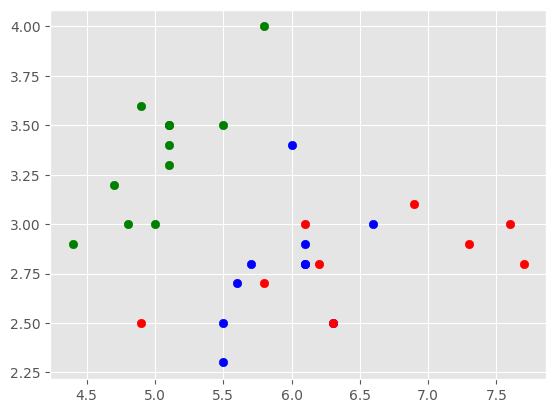

In [79]:
groups = prediction.group('Name').column('Name')
colors = ['g', 'b','r']
for x in groups:
    temp = prediction.where('Name', are.equal_to(x)).drop("Name")
    plt.scatter(temp['sepal length (cm)'], temp['sepal width (cm)'], color=colors[x])

### Fancy plot showing color coded decision boundaries
We can make a more informative plot by predicting on a grid of attribute values as shown below. Seaborn is an add-on to the Matplotlib plotting we have been using which provides more control of plotting. Execute (this may take a minute+) and study the below input and resulting output for your information.

In [71]:
def make_colors(iris, y, cmap):
    colors = []
    cdict = {'setosa':0, 'virginica':2, 'versicolor':1}
    for x in iris.target_names[y]:
        colors.append(cmap[cdict[x]])
    return colors

Text(0, 0.5, 'sepal width (cm)')

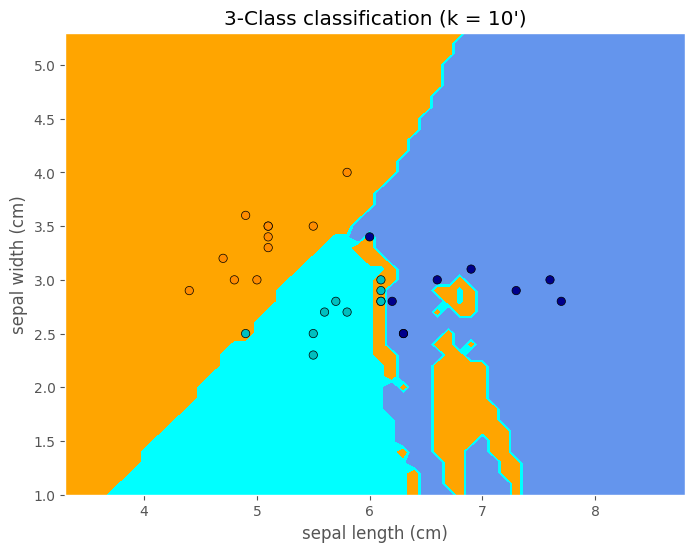

In [72]:
import seaborn as sns
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .1  # step size in the mesh
k = 10
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
## Create a grid of predictions in a Table
attribute_grid = Table().with_columns(iris.feature_names[0],np.c_[xx.ravel(), yy.ravel()][:,0],iris.feature_names[1],np.c_[xx.ravel(), yy.ravel()][:,1])

Z = np.array(predict(train_i,attribute_grid,k))

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the test points but convert to numpy arrays
predictions = prediction.column('predict')
attribute1 = prediction.column(1)
attribute2 = prediction.column(2)
plt.scatter(x=attribute1, y=attribute2, c = make_colors(iris, predictions, cmap_bold), alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i')"
              % (k))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Use scikit learn
[Scikit learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) is a standard state of the art machine learning library. For demonstration purposes execute the below commands to classify  and generate a comparable output.

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [81]:
clf = neighbors.KNeighborsClassifier(k) # Initiate the classifier
x_train, x_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, random_state=22) #  scikit split
# Now fit
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Text(0, 0.5, 'sepal width (cm)')

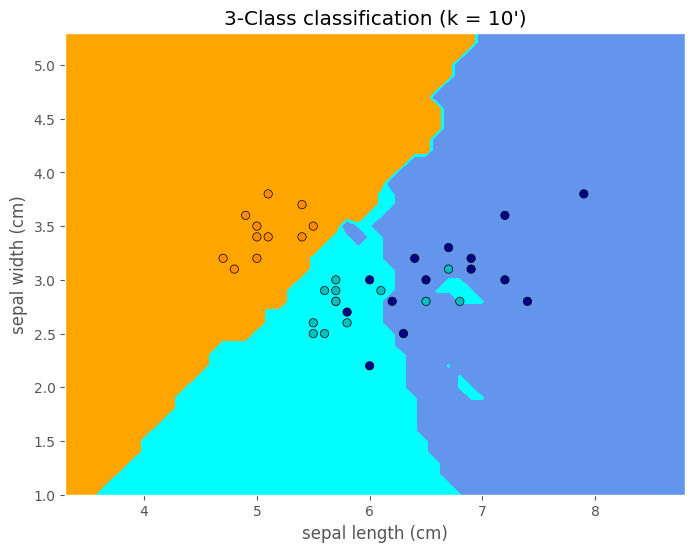

In [82]:
import seaborn as sns
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .1  # step size in the mesh
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
y = y_test
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c = make_colors(iris, y, cmap_bold),
                    alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i')"
              % (k))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

#### *Question 10* 
Comment on the quality of the predictions by <font color='blue'>
1. <font color='green'>Your nearest neighjbor algorithm 
2. <font color='green'>scikit learn 
3. <font color='green'>Comparison

#### <font color='blue'> Answers here </font>
***

## Molecules and predicting acidity measured by pKa
Within the Jupyter notebook we can also analyze molecules and their molecular data using the library  RDKit. RDKit adds the ability to visualize 2D and 3D molecular structures. We can apply many of the data science tools we have learned to molecular data as well. <br>First we will briefly look at acid-base chemistry and how acidity is defined. pH is a measure of the acidity of a water-based (aqueous) solution. A pH of 1 is acidic, a pH of 7 is neutral and a pH of 14 is basic.  Next we will use some computed atributes of a large set of molecules to train a k nearest neighbor model to predict acidity. We will use a range of attributes including the partial charges on atoms adjacent to the acidic proton, molecular weight, solvent accessible surface area (SASA), carbon-oxygen bond order, and some thermochemistry measures all of which may help predict acidity with a lower pKa indicating a stronger (weak) acid.

#### Acid-base and pKa background
A very brief background on acid - base equilibria demonstrated for glycine. See [OpenStax Chemistry](https://openstax.org/books/chemistry-2e/pages/14-introduction) for details based on interest.
<br><center><img src='acid_base_pKa.png' width=900></center>

### RDKit
[RDKit](https://www.rdkit.org/docs/Cookbook.html) is a specialized library to handle the complexities of molecules within Python. 

In [84]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
# Options
DrawingOptions.bondLineWidth=1.8
rd =True

##### Load detailed molecular data for 2000 molecules

In [85]:
url = "https://raw.githubusercontent.com/robraddi/GP-SAMPL7/main/pKaDatabase/OChem/ochem0-2000.csv"
data = Table.read_table(url)
data=data.sort('N')
data.show(5)

SMILES,CASRN,RECORDID,MOLECULEID,EXTERNALID,N,NAME,NAME.1,INTRODUCER,MODIFIER,ARTICLEID,PUBMEDID,PAGE,TABLE,pKa (smiles as ob. cond.) {measured},UNIT {pKa (smiles as ob. cond.)},"pKa (smiles as ob. cond.) {measured, converted}",UNIT {pKa (smiles as ob. cond.)}.1,Temperature,UNIT {Temperature},Ionizable centre (smiles),IC group given,IC index predicted,pKa predicted value 2,UNIT {pKa predicted value 2},pKa predicted value,UNIT {pKa predicted value},IC smiles given,AtomNR of IC,groupsAndICs,COMMENTS,INCHI_KEY
[O-]C1=C2C=CC=CC2=NC=N1,-,R1207641,M20829,-,-,4-Hydroxyquinazoline,-,Koerner,charochkina,A5793,-,-,-,9.87,Log unit,9.87,Log unit,25,?C,[O-]c1ncnc2ccccc12,2,7,nan,-,13.3393,Log unit,n(cnc1cc2)c([O-1])c1cc2,nan,nan,-,QMNUDYFKZYBWQX-UHFFFAOYSA
OC1=CC2=CN=CN=C2C=C1,-,R1207643,M1107327,-,-,6-hydroxyquinazoline,-,Koerner,charochkina,A5793,-,-,-,3.1,Log unit,3.1,Log unit,25,?C,n1cnc2ccc(cc2c1)O,3,0,nan,-,2.347,Log unit,n(cnc1cc2)cc1cc2O,nan,nan,-,BBPMVEXRMOAIKQ-UHFFFAOYSA
OC1=CC2=NC=NC=C2C=C1,-,R1207645,M1107328,-,-,7-hydroxyquinazoline,-,Koerner,charochkina,A5793,-,-,-,3.2,Log unit,3.2,Log unit,25,?C,n1cnc2cc(O)ccc2c1,3,0,nan,-,2.9534,Log unit,n(cnc1cc2O)cc1cc2,nan,nan,-,BWDCBBZUYJDNJZ-UHFFFAOYSA
CC1=C2C=CC=C(O)C2=NC=N1,-,R1207650,M46729,-,-,8-hydroxy-4-methylquinazoline,-,Koerner,charochkina,A5793,-,-,-,2.88,Log unit,2.88,Log unit,25,?C,n1cnc2c(cccc2c1C)O,2,0,nan,-,2.2299,Log unit,n(cnc1c(c2)O)c(C)c1cc2,nan,nan,-,RSHKEEMIDCYLTC-UHFFFAOYSA
[S-]c1ncc2ccccc2[n+]1,-,R1207652,M1158202,-,-,2-mercaptoquinazoline,-,Koerner,charochkina,A5793,-,-,-,0.26,Log unit,0.26,Log unit,25,?C,n1c([S-])[n+]c2c(c1)cccc2,n,2,nan,-,-6.7832,Log unit,[S-1]-c(ncc1cc2)[n+1]c1cc2,nan,nan,-,OOZNXWQOQWYLQB-UHFFFAOYSA


#### *Question 11.* Select an amino acid 
 Use the Table above to view data for an amino acid of your selection from the 21 amino acids which are building blocks of protiens. See [web page](https://i.pinimg.com/originals/a2/fd/dd/a2fddd4ad8b9067bfeb0d6f51cf28e71.jpg) for possible choices. Hint: use are.containing within the .where() Table method. For example below we can find compounds which contain a trimethyl group (3 CH$_3$) groups. We get 11 rows (records).

In [86]:
trimethyl = data.where("NAME",are.containing("trimethyl"))
trimethyl

SMILES,CASRN,RECORDID,MOLECULEID,EXTERNALID,N,NAME,NAME.1,INTRODUCER,MODIFIER,ARTICLEID,PUBMEDID,PAGE,TABLE,pKa (smiles as ob. cond.) {measured},UNIT {pKa (smiles as ob. cond.)},"pKa (smiles as ob. cond.) {measured, converted}",UNIT {pKa (smiles as ob. cond.)}.1,Temperature,UNIT {Temperature},Ionizable centre (smiles),IC group given,IC index predicted,pKa predicted value 2,UNIT {pKa predicted value 2},pKa predicted value,UNIT {pKa predicted value},IC smiles given,AtomNR of IC,groupsAndICs,COMMENTS,INCHI_KEY
CC1=NC(C)=C(C)C(=N1)S([O-])(=O)=O,-,R1207394,M1158149,-,-,"2,4,5-trimethyl-6-sulphopyrimidine",-,Koerner,charochkina,A5793,-,-,-,2.33,Log unit,2.33,Log unit,25,?C,n1c(nc(S(=O)(=O)[O-])c(c1C)C)C,1,7,nan,-,2.1966,Log unit,S(=O)(=O)([O-1])-c(nc(n1)C)c(c1C)C,nan,nan,-,KFMRGMKAGLDQJP-UHFFFAOYSA
CC1=NC(C)=C(C)N=N1,-,R1207401,M1158154,-,-,"3,5,6-trimethyl-1,2,4-triazine",-,Koerner,charochkina,A5793,-,-,-,2.8,Log unit,2.8,Log unit,25,?C,n1nc(nc(c1C)C)C,3,1,nan,-,2.6505,Log unit,n(nc(C)c1C)c(n1)C,nan,nan,-,INQFSKCZGLOEIY-UHFFFAOYSA
CC1=NC([O-])=NC(C)=C1C,-,R1207338,M1106856,-,-,"2-hydroxy-4,5,6-trimethylpyrimidine",-,Koerner,charochkina,A5793,-,-,-,10.55,Log unit,10.55,Log unit,25,?C,[O-]c1nc(C)c(C)c(n1)C,n,0,nan,-,14.3597,Log unit,[O-1]-c(nc(C)c1C)nc1C,nan,nan,-,ZRQPOQRDNYJQNB-UHFFFAOYSA
Cc1nc([O-])[n+]c(C)c1C,-,R1207339,M1158110,-,-,"2-hydroxy-4,5,6-trimethylpyrimidine",-,Koerner,charochkina,A5793,-,-,-,4.51,Log unit,4.51,Log unit,25,?C,[O-]c1[n+]c(C)c(C)c(n1)C,n,0,nan,-,5.7714,Log unit,[O-1]-c([n+1]c(C)c1C)nc1C,nan,nan,-,7a08c35d3c7a689daa070e599cf9d1d9
CCC1=C(C)N=NC(C)=C1C,-,R1207140,M1157998,-,-,"4-ethyl-3,5,6-trimethylpyridazine",-,Koerner,charochkina,A5793,-,-,-,5.17,Log unit,5.17,Log unit,25,?C,n1nc(C)c(c(c1C)CC)C,2,1,nan,-,4.8531,Log unit,n(nc(C)c1CC)c(C)c1C,nan,nan,-,QNHLVARSNAGPNO-UHFFFAOYSA
CC1=CC(C)=C(C)N=N1,-,R1207154,M1158007,-,-,"3,4,6-trimethylpyridazine",-,Koerner,charochkina,A5793,-,-,-,4.81,Log unit,4.81,Log unit,25,?C,n1nc(C)c(C)cc1C,2,0,nan,-,4.5613,Log unit,n(nc(C)c1C)c(c1)C,nan,nan,-,YWJKHFLZFCIARZ-UHFFFAOYSA
CNC(=N)N(C)C,-,R1206678,M1106709,-,-,"N,N',N'-trimethylaguanidine",-,Koerner,charochkina,A5793,-,-,-,13.9,Log unit,13.9,Log unit,25,?C,N=C(N(C)C)NC,neth,4,nan,-,13.1922,Log unit,CN(C)C(=N)NC,nan,nan,-,NQOFYFRKWDXGJP-UHFFFAOYSA
CNN(C)C,-,R1206476,M1016037,-,-,trimethylhydrazine,-,Koerner,charochkina,A5793,-,-,-,6.8,Log unit,6.8,Log unit,25,?C,N(C)N(C)C,3,0,nan,-,6.1616,Log unit,N(C)N(C)C,nan,nan,-,NIIPNAJXERMYOG-UHFFFAOYSA
CC1=C(C)C(C)=NO1,-,R1206399,M32590,-,-,"Isoxazoline, 3,4,5-trimethyl-",-,Koerner,charochkina,A5793,-,-,-,-1,Log unit,-1,Log unit,25,?C,n1oc(C)c(c1C)C,nethR,1,nan,-,1.781,Log unit,O(N=C1C)C(C)=C1C,nan,nan,-,MGHKWBQZEBMFOH-UHFFFAOYSA
CC1(C)C(CCC1(C)C(O)=O)C(O)=O,-,R1203666,M6436,-,-,"cyclopentan-1,3-dicarboxlic acid-1,2,2-trimethyl",-,Koerner,charochkina,A5793,-,-,-,5.01,Log unit,5.01,Log unit,25,?C,OC(=O)C1C(C(C(=O)O)(C)CC1)(C)C,co2h,11,nan,-,4.7979,Log unit,C1(C(=O)O)(C)C(C)(C)C(C(=O)O)CC1,nan,nan,-,LSPHULWDVZXLIL-UHFFFAOYSA


In [90]:
amino = data.where('NAME', are.equal_to('tyrosine'))
amino

SMILES,CASRN,RECORDID,MOLECULEID,EXTERNALID,N,NAME,NAME.1,INTRODUCER,MODIFIER,ARTICLEID,PUBMEDID,PAGE,TABLE,pKa (smiles as ob. cond.) {measured},UNIT {pKa (smiles as ob. cond.)},"pKa (smiles as ob. cond.) {measured, converted}",UNIT {pKa (smiles as ob. cond.)}.1,Temperature,UNIT {Temperature},Ionizable centre (smiles),IC group given,IC index predicted,pKa predicted value 2,UNIT {pKa predicted value 2},pKa predicted value,UNIT {pKa predicted value},IC smiles given,AtomNR of IC,groupsAndICs,COMMENTS,INCHI_KEY
[H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])C1=C([H])C([H]) ...,-,R1322002,M8281,-,193,tyrosine,-,Koerner,charochkina,A4065,19961204,-,-,2.06,Log unit,2.06,Log unit,nan,-,OC(=O)C(Cc1ccc(cc1)O)N,nan,nan,1.9998,Log unit,nan,-,nan,nan,nan,-,OUYCCCASQSFEME-QMMMGPOBSA
[H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])C1=C([H])C([H]) ...,-,R1322003,M8281,-,193,tyrosine,-,Koerner,charochkina,A4065,19961204,-,-,9.145,Log unit,9.145,Log unit,nan,-,NC(Cc1ccc(cc1)O)C(=O)O,nan,nan,9.1853,Log unit,nan,-,nan,nan,nan,-,OUYCCCASQSFEME-QMMMGPOBSA
[H]OC(=O)[C@@]([H])(N([H])[H])C([H])([H])C1=C([H])C([H]) ...,-,R1322004,M8281,-,193,tyrosine,-,Koerner,charochkina,A4065,19961204,-,-,10.265,Log unit,10.265,Log unit,nan,-,Oc1ccc(cc1)CC(C(=O)O)N,nan,nan,9.7922,Log unit,nan,-,nan,nan,nan,-,OUYCCCASQSFEME-QMMMGPOBSA


In [91]:
check('tests/q11.py')

### Display molecular structure
[SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) is a shorthand language to describe molecular structure. Execute each structure below.

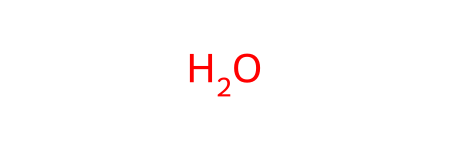

In [92]:
Chem.MolFromSmiles("[H]-O-[H]") #Water

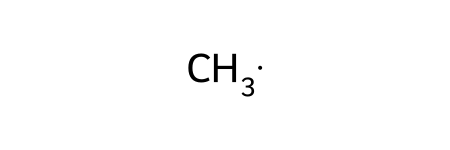

In [93]:
Chem.MolFromSmiles("[CH3]") #Methyl radical

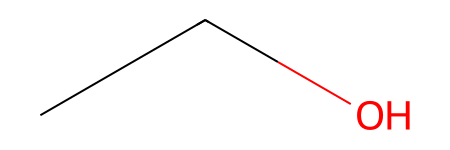

In [94]:
Chem.MolFromSmiles("C-C-O") #Ethanol

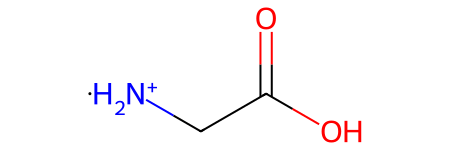

In [95]:
Chem.MolFromSmiles("[NH2+]CC(O)=O") # Glycine

#### Selected amino acid 2D molecular structure
Try it out for fun! Use the same above syntax and the SMILES string from your above Table to display a 2D amino acid structurefrom your selection. Even if there is no rdkit, try your hand at the SMILES molecular description.

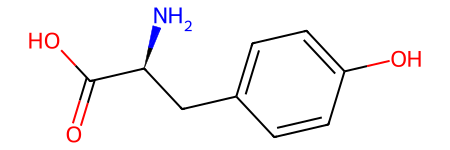

In [100]:
smile_struct = amino.column('SMILES')[1]

Chem.MolFromSmiles(smile_struct)

#### Code to create a grid of molecular images with labels
Execute and study the below code

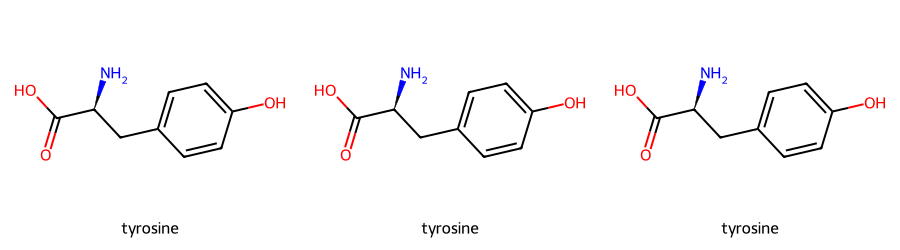

In [101]:
mols = [Chem.MolFromSmiles(x) for x in amino.column("SMILES") if x is not None] #Iterator
mols
name = amino.column("NAME")

for i,m in enumerate(mols):
    m.SetProp("Name",name[i])

p = Draw.MolsToGridImage( [mols[x] for x in range(0,3)] , legends=[x.GetProp("Name") for x in mols],molsPerRow=3,subImgSize=(300,250), useSVG=True )
p

### Use pandas to add 2D structures to dataframe
We can convert our Table to pandas then use the RDKit AddMoleculeColumnToFrame method to add structures. One row has an anomolous nitrogen atom, N, so don't be alarmed by the error presented. Occasionally the 2D images of the structures fail to appear, unfortunate but not a cause for concern either.

In [102]:
df = data.to_df()
df

,SMILES,CASRN,RECORDID,MOLECULEID,EXTERNALID,N,NAME,NAME.1,INTRODUCER,MODIFIER,...,IC index predicted,pKa predicted value 2,UNIT {pKa predicted value 2},pKa predicted value,UNIT {pKa predicted value},IC smiles given,AtomNR of IC,groupsAndICs,COMMENTS,INCHI_KEY
0,[O-]C1=C2C=CC=CC2=NC=N1,-,R1207641,M20829,-,-,4-Hydroxyquinazoline,-,Koerner,charochkina,...,7.0,NaN,-,13.3393,Log unit,n(cnc1cc2)c([O-1])c1cc2,NaN,nan,-,QMNUDYFKZYBWQX-UHFFFAOYSA
1,OC1=CC2=CN=CN=C2C=C1,-,R1207643,M1107327,-,-,6-hydroxyquinazoline,-,Koerner,charochkina,...,0.0,NaN,-,2.3470,Log unit,n(cnc1cc2)cc1cc2O,NaN,nan,-,BBPMVEXRMOAIKQ-UHFFFAOYSA
2,OC1=CC2=NC=NC=C2C=C1,-,R1207645,M1107328,-,-,7-hydroxyquinazoline,-,Koerner,charochkina,...,0.0,NaN,-,2.9534,Log unit,n(cnc1cc2O)cc1cc2,NaN,nan,-,BWDCBBZUYJDNJZ-UHFFFAOYSA
3,CC1=C2C=CC=C(O)C2=NC=N1,-,R1207650,M46729,-,-,8-hydroxy-4-methylquinazoline,-,Koerner,charochkina,...,0.0,NaN,-,2.2299,Log unit,n(cnc1c(c2)O)c(C)c1cc2,NaN,nan,-,RSHKEEMIDCYLTC-UHFFFAOYSA
4,[S-]c1ncc2ccccc2[n+]1,-,R1207652,M1158202,-,-,2-mercaptoquinazoline,-,Koerner,charochkina,...,2.0,NaN,-,-6.7832,Log unit,[S-1]-c(ncc1cc2)[n+1]c1cc2,NaN,nan,-,OOZNXWQOQWYLQB-UHFFFAOYSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,OC(=O)COC1=CC=CC(=C1)[N+]([O-])=O,1878-88-2,R2182408,M896,-,99,m-Nitrophenoxyacetic Acid,-,Koerner,Koerner,...,NaN,NaN,-,NaN,-,nan,NaN,nan,-,BNRRQAASFDGMMQ-UHFFFAOYSA
1996,COC1=CC=CC(OC)=C1C(=O)N[C@H]1[C@H]2SC(C)(C)[C@...,61-32-5,R1509608,M9792,-,99,"6-({[2,6-bis(methyloxy)phenyl]carbonyl}amino)-...",-,Koerner,Koerner,...,5.0,2.9643,Log unit,NaN,-,nan,NaN,nan,-,RJQXTJLFIWVMTO-TYNCELHUSA
1997,CCCCCCCC\C=C\CCCCCCCC(=O)OC[C@@H](CO[P@@](O)(=...,-,R1321912,M663928,-,99,"1,2-Dioleoylphosphatidylethano",-,Koerner,charochkina,...,NaN,7.7499,Log unit,NaN,-,nan,NaN,nan,-,MWRBNPKJOOWZPW-AODYVXGBSA
1998,CCCCCCCC\C=C\CCCCCCCC(=O)OCC(COP(O)(=O)OCCN)OC...,-,R1321798,M659539,-,99,"1,2-Dioleoylphosphatidylethanolamine",-,Koerner,charochkina,...,NaN,7.7499,Log unit,NaN,-,nan,NaN,nan,-,MWRBNPKJOOWZPW-XPWSMXQVSA


[19:49:55] Explicit valence for atom # 11 N, 4, is greater than permitted


,NAME,Molecule,SMILES,CASRN,RECORDID,MOLECULEID,EXTERNALID,N,NAME.1,INTRODUCER,...,IC index predicted,pKa predicted value 2,UNIT {pKa predicted value 2},pKa predicted value,UNIT {pKa predicted value},IC smiles given,AtomNR of IC,groupsAndICs,COMMENTS,INCHI_KEY
0,4-Hydroxyquinazoline,,[O-]C1=C2C=CC=CC2=NC=N1,-,R1207641,M20829,-,-,-,Koerner,...,7.0,NaN,-,13.3393,Log unit,n(cnc1cc2)c([O-1])c1cc2,NaN,nan,-,QMNUDYFKZYBWQX-UHFFFAOYSA
1,6-hydroxyquinazoline,,OC1=CC2=CN=CN=C2C=C1,-,R1207643,M1107327,-,-,-,Koerner,...,0.0,NaN,-,2.3470,Log unit,n(cnc1cc2)cc1cc2O,NaN,nan,-,BBPMVEXRMOAIKQ-UHFFFAOYSA
2,7-hydroxyquinazoline,,OC1=CC2=NC=NC=C2C=C1,-,R1207645,M1107328,-,-,-,Koerner,...,0.0,NaN,-,2.9534,Log unit,n(cnc1cc2O)cc1cc2,NaN,nan,-,BWDCBBZUYJDNJZ-UHFFFAOYSA
3,8-hydroxy-4-methylquinazoline,,CC1=C2C=CC=C(O)C2=NC=N1,-,R1207650,M46729,-,-,-,Koerner,...,0.0,NaN,-,2.2299,Log unit,n(cnc1c(c2)O)c(C)c1cc2,NaN,nan,-,RSHKEEMIDCYLTC-UHFFFAOYSA
4,2-mercaptoquinazoline,,[S-]c1ncc2ccccc2[n+]1,-,R1207652,M1158202,-,-,-,Koerner,...,2.0,NaN,-,-6.7832,Log unit,[S-1]-c(ncc1cc2)[n+1]c1cc2,NaN,nan,-,OOZNXWQOQWYLQB-UHFFFAOYSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,m-Nitrophenoxyacetic Acid,,OC(=O)COC1=CC=CC(=C1)[N+]([O-])=O,1878-88-2,R2182408,M896,-,99,-,Koerner,...,NaN,NaN,-,NaN,-,nan,NaN,nan,-,BNRRQAASFDGMMQ-UHFFFAOYSA
1996,"6-({[2,6-bis(methyloxy)phenyl]carbonyl}amino)-...",,COC1=CC=CC(OC)=C1C(=O)N[C@H]1[C@H]2SC(C)(C)[C@...,61-32-5,R1509608,M9792,-,99,-,Koerner,...,5.0,2.9643,Log unit,NaN,-,nan,NaN,nan,-,RJQXTJLFIWVMTO-TYNCELHUSA
1997,"1,2-Dioleoylphosphatidylethano",,CCCCCCCC\C=C\CCCCCCCC(=O)OC[C@@H](CO[P@@](O)(=...,-,R1321912,M663928,-,99,-,Koerner,...,NaN,7.7499,Log unit,NaN,-,nan,NaN,nan,-,MWRBNPKJOOWZPW-AODYVXGBSA
1998,"1,2-Dioleoylphosphatidylethanolamine",,CCCCCCCC\C=C\CCCCCCCC(=O)OCC(COP(O)(=O)OCCN)OC...,-,R1321798,M659539,-,99,-,Koerner,...,NaN,7.7499,Log unit,NaN,-,nan,NaN,nan,-,MWRBNPKJOOWZPW-XPWSMXQVSA

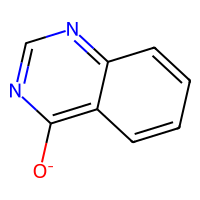
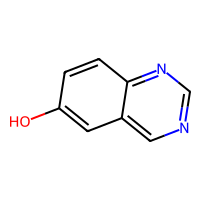
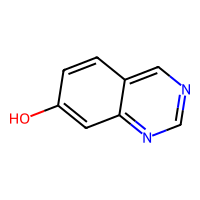
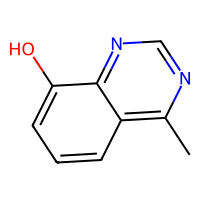
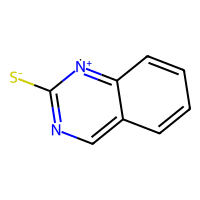
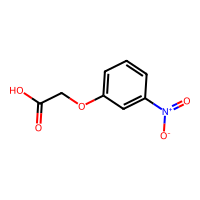
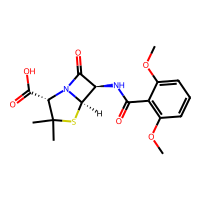
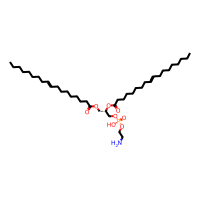
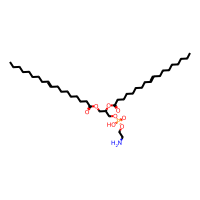
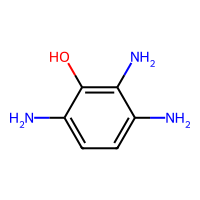

In [103]:
df = data.to_df() # Convert Table to pandas dataframe
PandasTools.AddMoleculeColumnToFrame(df,smilesCol='SMILES',molCol='Molecule',includeFingerprints=True)
col = df.pop("NAME")
df.insert(0, col.name, col) # Move structure to first column
col = df.pop("Molecule")
df.insert(1, col.name, col) # Move structure to first column
df

### pKa data examination
Now we will look at a data set derived from the above data but with computed molecular attributes for our machine learning. This data set is computed and described by  [Prof. Vince Voelz](http://www.voelzlab.org) in the Temple Chemistry department and a graduate student, Robert Raddi. See their paper: [Stacking Gaussian processes to improve pKa predictions in the SAMPL7 challenge](https://link.springer.com/epdf/10.1007/s10822-021-00411-8?sharing_token=yLV8dMXdxg40M_Ds_2Rhsfe4RwlQNchNByi7wbcMAY6fCl3bMLQiAhJzS2zZw-SwUkz490heLLZu1bPJ8T5LHXo1WvZkp0AJmWzXo71rszl8UaPxjqtqR-oARfxWGrTiCV0rNXy0C7IVzX6yoMYTPv2ZJfnQS-zF1pYvL8ESsUI%3D).

In [104]:
db = pd.read_pickle("data/pKaDatabaseF22.pkl")
db_table = Table().from_df(db) # Datascience Table from pandas dataframe
db

,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),...,SASA (Lee),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),pKa,href,Weight,num ionizable groups,pKa source,protonated molecule,deprotonated molecule
0,methyclothiazide_micro001,methyclothiazide_micro000,C[N@]1[C@@H]([N-]c2cc(c(cc2S1(=O)=O)S(=O)(=O)N...,C[N@]1[C@@H](Nc2cc(c(cc2S1(=O)=O)S(=O)(=O)N)Cl...,-0.79657,-0.55694,0.402800,0.330770,-0.447656,-0.405384,...,9.899414,0.714946,-0.793388,9.40,caine2019experiment,360.220000,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc46780b650>,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c7290>
1,sulpiride_micro001,sulpiride_micro000,CC[N@]1CCC[C@H]1C[N-]C(=O)c2cc(ccc2OC)S(=O)(=O)N,CC[N@]1CCC[C@H]1CNC(=O)c2cc(ccc2OC)S(=O)(=O)N,-0.53903,-0.59248,0.376450,0.329985,-0.291253,-0.324665,...,9.676525,0.692298,3.151623,10.21,caine2019experiment,341.400000,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc46780b6f0>,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c72e0>
2,celecoxib_micro001,celecoxib_micro000,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)[NH-])C(...,Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F,-1.02861,-1.31288,1.525610,1.657150,-0.558303,-0.574737,...,12.402807,0.689078,0.218695,11.10,caine2019experiment,381.400000,1.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc46780b740>,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c7330>
3,metolazone_micro001,metolazone_micro000,Cc1ccccc1N2[C@@H]([N-]c3cc(c(cc3C2=O)S(=O)(=O)...,Cc1ccccc1N2[C@@H](Nc3cc(c(cc3C2=O)S(=O)(=O)N)Cl)C,-0.74198,-0.55041,0.316865,0.292335,-0.354740,-0.335038,...,10.720588,0.713289,0.808265,9.70,caine2019experiment,365.800000,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc46780b790>,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c7380>
4,polythiazide_micro001,polythiazide_micro000,C[N@]1[C@@H]([N-]c2cc(c(cc2S1(=O)=O)S(=O)(=O)N...,C[N@]1[C@@H](Nc2cc(c(cc2S1(=O)=O)S(=O)(=O)N)Cl...,-0.79841,-0.56617,0.412410,0.343865,-0.458234,-0.419302,...,11.673626,0.726989,0.230973,9.10,caine2019experiment,439.900000,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc46780b7e0>,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c73d0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,sulfadimethoxine_micro001,sulfadimethoxine_micro000,COc1cc([N-]S(=O)(=O)c2ccc(N)cc2)nc(OC)n1,N([H])(c1nc(OC([H])([H])[H])nc(OC([H])([H])[H]...,-0.86987,-0.98043,1.116625,1.236825,-0.641240,-0.677832,...,13.363709,0.690570,-0.997823,7.02,NaN,310.073576,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c70b0>,<rdkit.Chem.rdchem.Mol object at 0x7fc46637ed40>
138,sulfamethoxydiazine_micro001,sulfamethoxydiazine_micro000,COc1cnc([N-]S(=O)(=O)c2ccc(N)cc2)nc1,N([H])(c1nc([H])c(OC([H])([H])[H])c([H])n1)S(=...,-0.85693,-0.86838,1.173495,1.254585,-0.656337,-0.692953,...,13.757159,0.703955,1.207213,6.63,NaN,280.063011,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c7100>,<rdkit.Chem.rdchem.Mol object at 0x7fc46637ed90>
139,sulfisomidine_micro001,sulfisomidine_micro000,Cc1cc([N-]S(=O)(=O)c2ccc(N)cc2)nc(C)n1,N([H])(c1nc(C([H])([H])[H])nc(C([H])([H])[H])c...,-0.87755,-0.90794,1.095525,1.169120,-0.621792,-0.650823,...,13.885995,0.699020,-0.019763,7.40,NaN,278.083747,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c7150>,<rdkit.Chem.rdchem.Mol object at 0x7fc46637ede0>
140,sulfamethazine_micro001,sulfamethazine_micro000,Cc1cc(C)nc([N-]S(=O)(=O)c2ccc(N)cc2)n1,N([H])(c1nc(C([H])([H])[H])c([H])c(C([H])([H])...,-0.85927,-0.94180,1.196925,1.310425,-0.670377,-0.710920,...,13.804486,0.700089,1.263680,7.37,NaN,278.083747,2.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fc4664c71a0>,<rdkit.Chem.rdchem.Mol object at 0x7fc46637ee30>


##### We can look at the structures and data on several derivatives of acetic acid by executing the code below

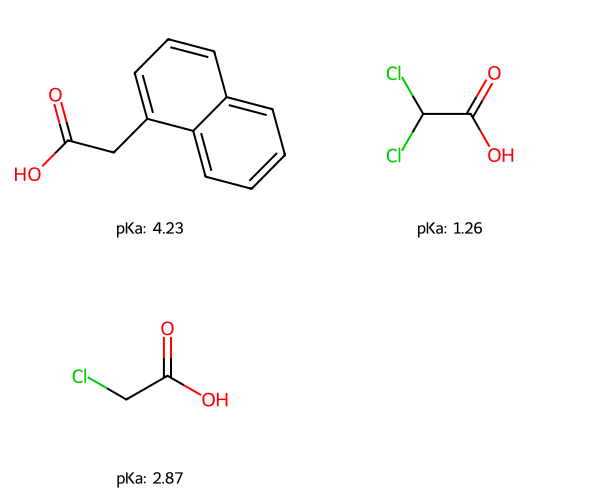

In [105]:
glycine=db_table.where("protonated microstate ID",are.containing("acetic acid")) # Select those data containing acetic acid in the name.
mols = [Chem.MolFromSmiles(x) for x in glycine.column("protonated microstate smiles") if x is not None]
pKa = glycine.column("pKa")

for i,m in enumerate(mols):
    m.SetProp("Name","pKa: "+str(pKa[i]))
p = Draw.MolsToGridImage( [mols[x] for x in range(0,3)] , legends=[x.GetProp("Name") for x in mols],molsPerRow=2,subImgSize=(300,250), useSVG=True )
p

### protonated microstate smiles
Here we place the pKa which we will predict in the first column. Use SMILES format to display structures. Execute the below cells.

In [106]:
#PandasTools.AddMoleculeColumnToFrame(db,smilesCol='protonated microstate smiles',molCol='Molecule',includeFingerprints=True)
PandasTools.AddMoleculeColumnToFrame(db, smilesCol='protonated microstate smiles', molCol='protonated molecule')
PandasTools.AddMoleculeColumnToFrame(db, smilesCol='deprotonated microstate smiles', molCol='deprotonated molecule')
col = db.pop('protonated molecule')
db.insert(0, col.name, col)
col = db.pop('deprotonated molecule')
db.insert(1, col.name, col)
col = db.pop("pKa")
db.insert(0, col.name, col)
db=db.sort_values(by='pKa',ascending=False)
db.head()

,pKa,protonated molecule,deprotonated molecule,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),...,Extented Hückel partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),SASA (Lee),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),href,Weight,num ionizable groups,pKa source
735,19.2,<rdkit.Chem.rdchem.Mol object at 0x7fc467b02c70>,<rdkit.Chem.rdchem.Mol object at 0x7fc4678e9af0>,2-Methyl-2-propanol_micro001,2-Methyl-2-propanol_micro000,CC(C)(C)[O-],CC(C)(C)O,-0.59945,-0.89949,0.14550,...,-0.078697,-3.830199,15.763255,15.606648,0.592560,5.993620,OChem/ochem_database.pkl,NaN,1.0,NaN
1323,17.6,<rdkit.Chem.rdchem.Mol object at 0x7fc467b2eff0>,<rdkit.Chem.rdchem.Mol object at 0x7fc467905e70>,2-butanol_micro001,2-butanol_micro000,CC[C@H](C)[O-],CC[C@H](C)O,-0.59952,-0.89927,0.13978,...,-0.051464,-2.130056,16.255857,16.216629,0.605273,3.305126,OChem/ochem_database.pkl,NaN,1.0,NaN
832,17.1,<rdkit.Chem.rdchem.Mol object at 0x7fc467b11770>,<rdkit.Chem.rdchem.Mol object at 0x7fc4679205f0>,2-Propanol_micro001,2-Propanol_micro000,CC(C)[O-],CC(C)O,-0.60156,-0.90627,0.13834,...,-0.077626,-1.610989,17.241060,17.052961,0.601137,3.349921,OChem/ochem_database.pkl,NaN,1.0,NaN
1200,16.6,<rdkit.Chem.rdchem.Mol object at 0x7fc467b27990>,<rdkit.Chem.rdchem.Mol object at 0x7fc4678fa810>,3-methylindole_micro001,3-methylindole_micro000,Cc1c[n-]c2c1cccc2,Cc1c[nH]c2c1cccc2,-0.58407,-0.41610,0.03945,...,-0.329121,-2.156373,12.315043,12.143030,0.719695,2.331782,OChem/ochem_database.pkl,NaN,0.0,NaN
1473,16.4,<rdkit.Chem.rdchem.Mol object at 0x7fc46787cdd0>,<rdkit.Chem.rdchem.Mol object at 0x7fc4678c7bc0>,Mandelic acid_micro001,Mandelic acid_micro000,c1ccc(cc1)[C@H](C(=O)[O-])[O-],c1ccc(cc1)[C@H](C(=O)[O-])O,-0.63444,-0.91074,0.03854,...,-0.394657,-22.344141,17.733662,17.323053,0.607562,1.288648,OChem/ochem_database.pkl,NaN,1.0,NaN


### Examine a few acidity and molecular weight distribution
The below code will generate histograms for acidity as measured by pKa and molar molecular weight measured in grams per mole. Execute code and examine output.

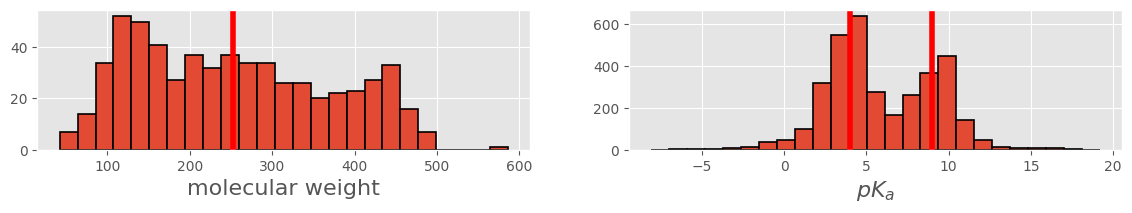

In [107]:
fig = plt.figure()
ax = plt.subplot(2,2,1)
ax1 = plt.subplot(2,2,2)
db.sort_values('Weight', ascending=True)
ax = db["Weight"].plot.hist(rot=0, figsize=(14, 4), bins=25, edgecolor='black', linewidth=1.2, ax=ax)
ax.set_xlabel("molecular weight", size=16)
ax.set_ylabel("", size=12)
ax.axvline(x=db['Weight'].mean(), linewidth=4, color='r')

ax1 = db["pKa"].plot.hist(rot=0, figsize=(14, 4), bins=25, edgecolor='black', linewidth=1.2, ax=ax1)#, subplots=True, layout=(2,2))
ax1.set_xlabel(r"$pK_{a}$", size=16)
ax1.set_ylabel("", size=12)
ax1.axvline(x=4, linewidth=4, color='r')
ax1.axvline(x=9, linewidth=4, color='r')
fig = ax1.get_figure()
fig.savefig("MW_dist.pdf")

### Look at pKa and molecular attribute relationships
Here we will plot some of the attributes to see if there is a relationship between their values and the pKa we are trying to predict. Execute these cells.

<Axes: xlabel='Weight', ylabel='pKa'>

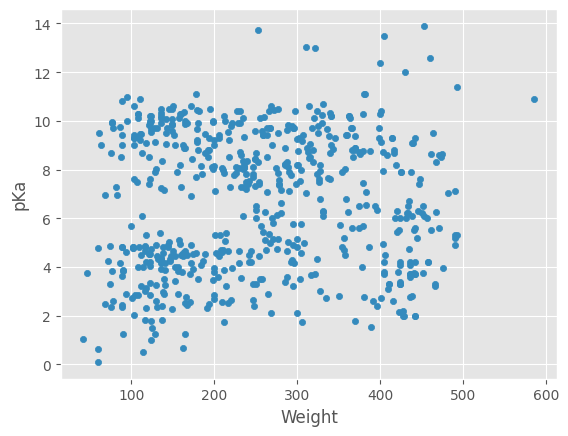

In [108]:
db.plot.scatter("Weight","pKa")

<Axes: xlabel='AM1BCC partial charge (prot. atom)', ylabel='pKa'>

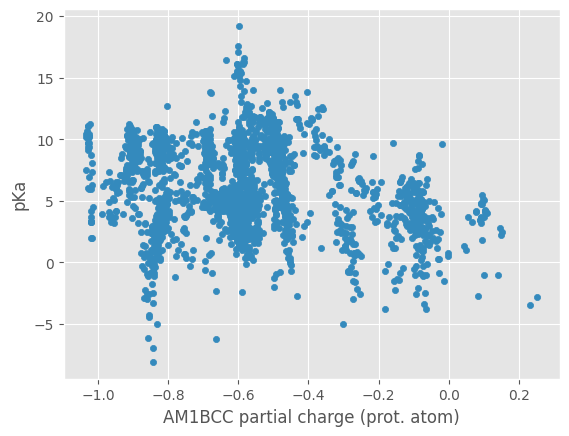

In [109]:
db.plot.scatter("AM1BCC partial charge (prot. atom)","pKa")

<Axes: xlabel='Bond Order', ylabel='pKa'>

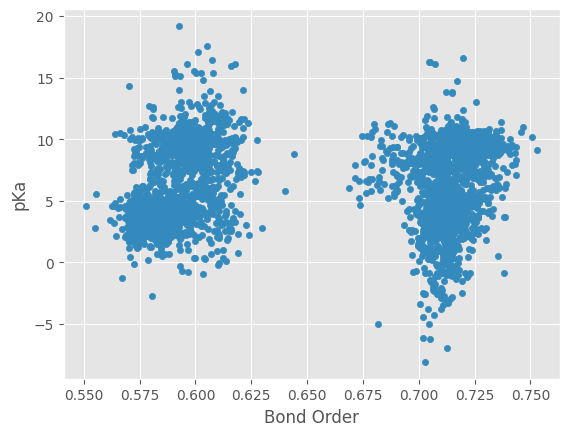

In [110]:
db.plot.scatter("Bond Order","pKa")

###  Nearest Neighbor
Let's restrict our consideration to acids with 0 < pKa < 7. The reason may be evident from the distribution in the histogram of pKa's above with two peaks, one around 4 and another at 8. The negative pKa's are outliers which also will be difficult to predict. For machine learning we will also drop the 2D molecular structures.

In [111]:
dblow = db[db["pKa"].values<7]
dblow = dblow[dblow["pKa"].values>0]

List attribute columns with index

In [112]:
for (i, item) in enumerate(list(dblow.columns)):
    print(i, item)

0 pKa
1 protonated molecule
2 deprotonated molecule
3 deprotonated microstate ID
4 protonated microstate ID
5 deprotonated microstate smiles
6 protonated microstate smiles
7 AM1BCC partial charge (prot. atom)
8 AM1BCC partial charge (deprot. atom)
9 AM1BCC partial charge (prot. atoms 1 bond away)
10 AM1BCC partial charge (deprot. atoms 1 bond away)
11 AM1BCC partial charge (prot. atoms 2 bond away)
12 AM1BCC partial charge (deprot. atoms 2 bond away)
13 Gasteiger partial charge (prot. atom)
14 Gasteiger partial charge (deprot. atom)
15 Gasteiger partial charge (prot. atoms 1 bond away)
16 Gasteiger partial charge (deprot. atoms 1 bond away)
17 Gasteiger partial charge (prot. atoms 2 bond away)
18 Gasteiger partial charge (deprot. atoms 2 bond away)
19 Extented Hückel partial charge (prot. atom)
20 Extented Hückel partial charge (deprot. atom)
21 Extented Hückel partial charge (prot. atoms 1 bond away)
22 Extented Hückel partial charge (deprot. atoms 1 bond away)
23 Extented Hückel part

#### Selection of attributes/features for training and prediction
We need too select the features that we will use in the training. These will include the charges computed for key atoms adjacent to the acidic proton (H+) in columns (7-12) using the AM1BCC method, ∆G_solv (kJ/mol) (prot-deprot) in column 25,solvent accessible surface area (SASA) in column 26, bond order in column 28, Change in Enthalpy (kJ/mol) (prot-deprot) in column 29, and molecular weight in column 32. These are the 11 attributes features we will use. We also keep the labels and SMILES as well as the pKa we will train on.

In [113]:
molecular = Table().from_df(dblow) # Now back to Table
molecular = molecular.select(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 25, 26,  28, 29, 32)
molecular

pKa,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups
6.98,Fenpropimorph_micro001,Fenpropimorph_micro000,C[C@@H]1CN(C[C@@H](O1)C)C[C@H](C)Cc2ccc(cc2)C(C)(C)C,C[C@@H]1C[NH+](C[C@@H](O1)C)C[C@H](C)Cc2ccc(cc2)C(C)(C)C,-0.68511,-0.73381,0.08429,0.15012,-0.241648,-0.249836,-181.942,3.69451,0.690272,-3.31925,1
6.95,2-(N-(2-cyanoethyl)-N-methyl)aminopropylbenzene_micro001,2-(N-(2-cyanoethyl)-N-methyl)aminopropylbenzene_micro000,C[N@@](CCCc1ccccc1)CCC#N,C[N@@H+](CCCc1ccccc1)CCC#N,-0.6868,-0.71558,0.0980667,0.152773,-0.377603,-0.38171,-7.79839,5.66492,0.729181,-5.29326,1
6.95,2-bis(2-chloroethyl)aminopropane_micro001,2-bis(2-chloroethyl)aminopropane_micro000,CC(C)N(CCCl)CCCl,CC(C)[NH+](CCCl)CCCl,-0.70654,-0.72922,0.11593,0.159537,-0.288393,-0.267537,-211.778,4.92602,0.712272,-3.40698,1
6.95,Imidazole_micro001,Imidazole_micro000,c1cnc[n-]1,c1cnc[nH]1,-0.32082,-0.77555,0.059345,0.254725,-0.23172,-0.478817,-2.38957,12.8076,0.709959,2.43947,1
6.95,3-methoxy-6-mercaptopyridazine_micro001,3-methoxy-6-mercaptopyridazine_micro000,COc1ccc(nn1)[S-],COc1ccc(nn1)S,-0.31734,-0.8696,0.39356,0.63947,-0.23098,-0.321095,260.578,20.1967,0.692136,3.23352,0
6.95,1-Methylimidazole_micro001,1-Methylimidazole_micro000,Cn1ccnc1,Cn1cc[nH+]c1,-0.13447,-0.6681,-0.0652,0.339775,-0.08754,-0.379837,-0.763702,12.315,0.712302,-0.0497005,1
6.95,"Morpholine, N-(3-ethylcarbonyl-3,3-diphenyl)propyl-_micro001","Morpholine, N-(3-ethylcarbonyl-3,3-diphenyl)propyl-_micro000",CCC(=O)C(CCN1CCOCC1)(c2ccccc2)c3ccccc3,CCC(=O)C(CC[NH+]1CCOCC1)(c2ccccc2)c3ccccc3,-0.68628,-0.75366,0.0838167,0.156463,-0.255792,-0.265154,-194.77,3.94081,0.736083,-3.04835,1
6.94,Barbituric acid_micro001,Barbituric acid_micro000,CC[C@]1(C(=O)NC(=O)[N-]C1=O)c2ccc(cc2)[N+](=O)[O-],CCC1(C(=O)NC(=O)NC1=O)c2ccc(cc2)[N+](=O)[O-],-0.59474,-0.53725,0.763895,0.733295,-0.500314,-0.554638,-4.01867,12.0687,0.696479,0.947145,2
6.94,4-mercaptopyrimidine_micro001,4-mercaptopyrimidine_micro000,c1cncnc1[S-],c1cncnc1S,-0.31642,-0.87725,0.53312,0.72799,-0.53722,-0.593995,269.511,19.9504,0.682072,3.18459,0
6.92,"2,3-diaminobutane_micro001","2,3-diaminobutane_micro000",C[C@@H]([C@H](C)[NH-])[NH3+],C[C@@H]([C@H](C)N)[NH3+],-0.92502,-0.66069,0.20236,0.22329,-0.031075,-0.30179,-247.38,6.89642,0.716106,1.05826,2


### Train, test split
####  *Question 12* 
Split the molecular Table into train and test data using 80% for training and remembering that the split must be an integer using int() function. Again we will select certain rowsas attributes.

In [114]:
train, test = molecular.split(int(molecular.num_rows * 0.8))
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

train.show(3)

1636 training and 409 test instances.


pKa,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups
5.45,2-chloro-4-nitrophenol_micro001,2-chloro-4-nitrophenol_micro000,c1cc(c(cc1[N+](=O)[O-])Cl)[O-],c1cc(c(cc1[N+](=O)[O-])Cl)O,-0.47593,-0.70122,0.18145,0.58481,-0.12819,-0.241815,223.45,18.2263,0.583606,2.46493,1
3.6,b'(4-hydroxy-2-octanoyloxy-4-oxobutyl)-trimethylazanium' ...,b'(4-hydroxy-2-octanoyloxy-4-oxobutyl)-trimethylazanium' ...,CCCCCCCC(=O)O[C@H](CC(=O)[O-])C[N+](C)(C)C,CCCCCCCC(=O)O[C@H](CC(=O)O)C[N+](C)(C)C,-0.58613,-0.55584,0.63502,0.64261,-0.34994,-0.29143,-8.48089,14.2855,0.591206,7.63439,1
5.42,N-n-hexylaniline_micro001,N-n-hexylaniline_micro000,CCCCCC[N-]c1ccccc1,CCCCCCNc1ccccc1,-0.75684,-0.66294,0.18378,0.21337,-0.30955,-0.3351,-4.89467,11.0835,0.720826,-0.143156,1


In [115]:
check('tests/q12.py')

### Our k nearest neighbors code

Remember our the k nearest neighbor code from above which wewill again use here.
<code>
    def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))
</code>

### Test algorithm
Execute these cells to define the predict_nn function for pKa, pick an example row, predict and compare.

In [116]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    k = 10
    return np.average(closest(train.drop(1,2,3,4), example, k, 'pKa').column('pKa'))

Examine 1 row in test set to try to predict

In [117]:
test.drop(1,2,3,4).take(100)

pKa,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups
3.475,-0.61313,-0.82157,0.65468,0.93135,-0.30407,-0.479865,773.519,17.2411,0.581473,7.69692,2


In [118]:
# Look at closest in training set to test row, need to drop pKa from test
k = 10
closest(train.drop(1,2,3,4), test.drop(0,1,2,3,4).row(100), k, 'pKa').select('pKa','Distance')

pKa,Distance
3.54,2.8079
5.32,5.26153
3.76,8.47076
0.7,8.49632
2.27,8.75579
4.61,14.5693
3.5,18.8105
3.74,19.6644
4.65,19.9058
4.12,24.1732


#### If we use test data in both cases we get exact match (Distance = 0) and no training, not machine learning but matching!

In [119]:
closest(test.drop(1,2,3,4), test.drop(0,1,2,3,4).row(100), k, 'pKa').select('pKa','Distance')

pKa,Distance
3.475,0
4.63,4.80162
3.79,11.3931
1.99,75.6961
4.88,78.6156
4.61,82.4545
1.75,92.6594
4.12,100.756
4.66,101.143
3.49,109.615


### Histogram of experimental acidity to be predicted
#### *Question*  
Make a histogram of acidity measured by pKa in the training data

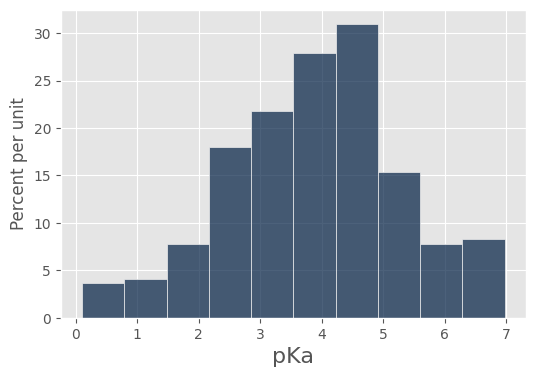

In [120]:
train.hist('pKa')

### *Question 13* Prediction time
Now predict the pKa of the 10 molecule in the test_nn dataset using predict. We need to drop the experimental pKa and descriptors in the first 4 columns to create and example_nn_row with the attributes for the k nearest neighbor. Discuss the quality of the fit and the name of the name of the molecule from column 1. Repeat for two more rows and discuss the prediction quality. Keep in mind that the prediction of pKa is a very challenging task for machine learning.

In [125]:
example_nn_row = test.drop(0, 1, 2, 3, 4).drop('pKa').row(9)
example_nn_row

Row(AM1BCC partial charge (prot. atom)=-0.68251001637364772, AM1BCC partial charge (deprot. atom)=-0.9802500008556404, AM1BCC partial charge (prot. atoms 1 bond away)=1.1604000051698551, AM1BCC partial charge (deprot. atoms 1 bond away)=1.2569400073078119, AM1BCC partial charge (prot. atoms 2 bond away)=-0.58977667293136671, AM1BCC partial charge (deprot. atoms 2 bond away)=-0.66379166633021414, ∆G_solv (kJ/mol) (prot-deprot)=-14.985120518945337, SASA (Shrake)=14.039149250362067, Bond Order=0.71804768225048943, Change in Enthalpy (kJ/mol) (prot-deprot)=13.346368193435341, num ionizable groups=3.0)

In [126]:
example_nn_row_table = test.drop(0, 1, 2, 3, 4).drop('pKa').take(9) # For display and verification
example_nn_row_table

AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups
-0.68251,-0.98025,1.1604,1.25694,-0.589777,-0.663792,-14.9851,14.0391,0.718048,13.3464,3


In [127]:
predict_nn(example_nn_row)

4.5759999999999996

In [128]:
print('Experimental pKa:', test.column('pKa').item(9))
print('Predicted pKa using nearest neighbors:', round(predict_nn(example_nn_row),2))

Experimental pKa: 5.21
Predicted pKa using nearest neighbors: 4.58


In [129]:
check('tests/q13.py')

### Now let's plot knn prediction success
Execute the next three cells

In [130]:
exp_pKa = make_array()
predict_pKA = make_array()

In [131]:
# This takes a while!
for i in np.arange(test.num_rows):
    exp_pKa = np.append(exp_pKa,test.column('pKa').item(i))
    example_nn_row = test.drop(0,1,2,3,4).row(i)
    predict_pKA = np.append(predict_pKA,predict_nn(example_nn_row) )

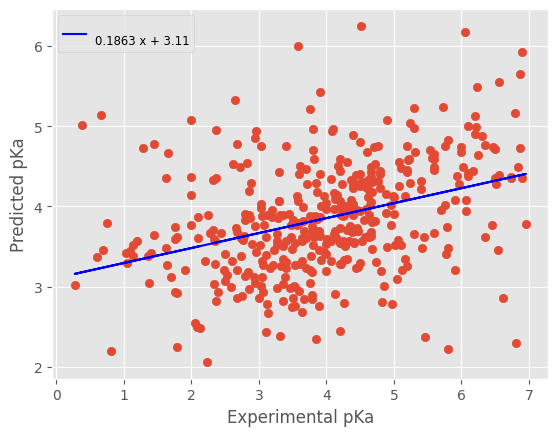

In [132]:
plt.scatter(exp_pKa,predict_pKA)
#calculate equation for regression line
z = np.polyfit(exp_pKa,predict_pKA, 1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(exp_pKa, p(exp_pKa),'blue',label="{}".format(p)) # Equation of line placed in legend from label
plt.xlabel("Experimental pKa")
plt.ylabel("Predicted pKa")
plt.legend(fontsize="small")
plt.show()

### Conclusions on our k nearest neighbor model
#### *Question 14* 
Evaluate the overall quality of our machine learning prediction based on the above plot and your 3 predictions above.

<font color='blue'>Your discussion </font>
***   

Now we will try a few values for k to try to optimize this hyperparameter. We need a new version of `predict_nn` that also has an argument of k.

In [133]:
def predict_knn(example,k):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train.drop(1,2,3,4), example, k, 'pKa').column('pKa'))

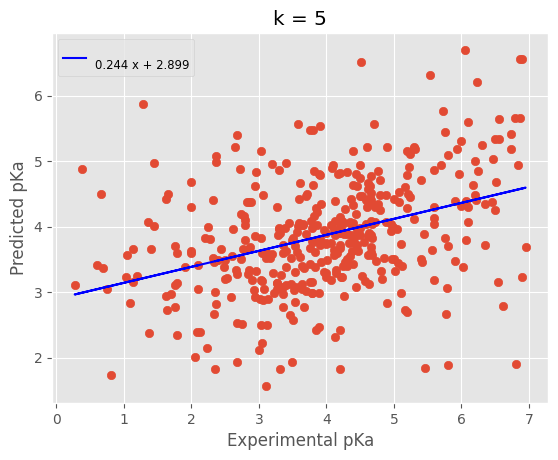

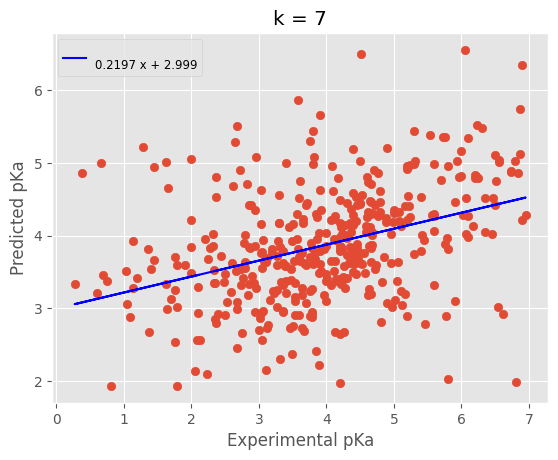

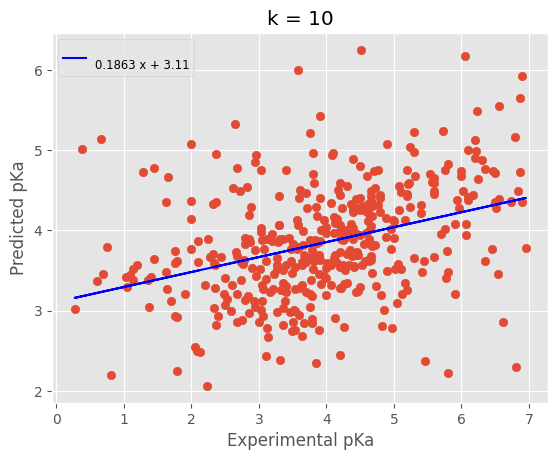

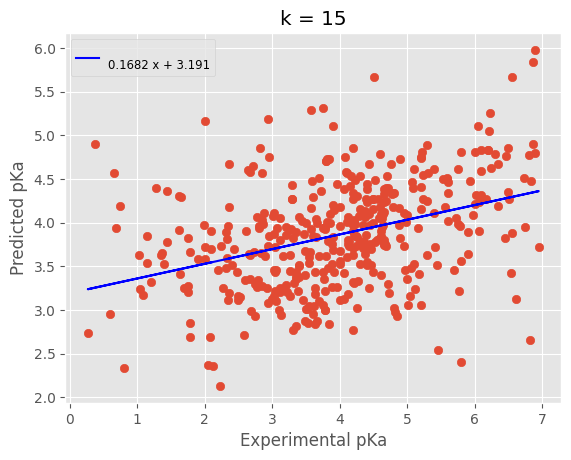

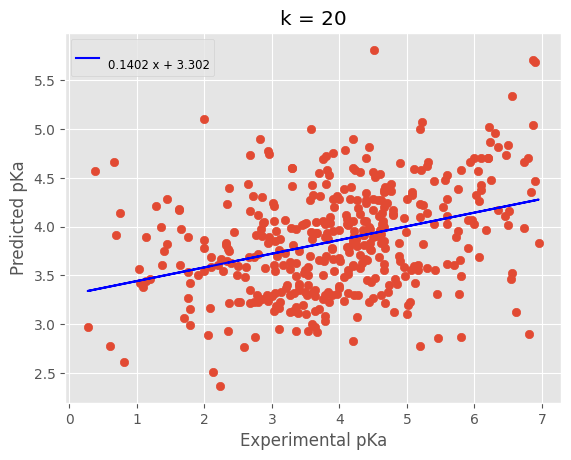

In [134]:
for k in [5,7,10,15,20]:
    exp_pKa = make_array()
    predict_pKA = make_array()
    for i in np.arange(test.num_rows):
        exp_pKa = np.append(exp_pKa,test.column('pKa').item(i))
        example_nn_row = test.drop(0,1,2,3,4).row(i)
        predict_pKA = np.append(predict_pKA,predict_knn(example_nn_row,k) )
    plt.scatter(exp_pKa,predict_pKA)
    z = np.polyfit(exp_pKa,predict_pKA, 1)
    p = np.poly1d(z)
    plt.plot(exp_pKa, p(exp_pKa),'blue',label="{}".format(p)) # Equation of line placed in legend from label
    plt.xlabel("Experimental pKa")
    plt.ylabel("Predicted pKa")
    plt.title("k = "+str(k))
    plt.legend(fontsize="small")
    plt.show()

*Question:* Which value of `k` makes the best estimation?

In [135]:
k = 5

In [136]:
check('tests/q14.py')

#### Extra (advanced): Try to vary the set of parameters/attributes by using fewer attributes or where choices exist such as using Gasteiger partial charges instead of AM1BCC or removing moolecular weight or other attributes.

In [137]:
for (i, item) in enumerate(list(dblow.columns)): # List of attributes
    print(i, item)

0 pKa
1 protonated molecule
2 deprotonated molecule
3 deprotonated microstate ID
4 protonated microstate ID
5 deprotonated microstate smiles
6 protonated microstate smiles
7 AM1BCC partial charge (prot. atom)
8 AM1BCC partial charge (deprot. atom)
9 AM1BCC partial charge (prot. atoms 1 bond away)
10 AM1BCC partial charge (deprot. atoms 1 bond away)
11 AM1BCC partial charge (prot. atoms 2 bond away)
12 AM1BCC partial charge (deprot. atoms 2 bond away)
13 Gasteiger partial charge (prot. atom)
14 Gasteiger partial charge (deprot. atom)
15 Gasteiger partial charge (prot. atoms 1 bond away)
16 Gasteiger partial charge (deprot. atoms 1 bond away)
17 Gasteiger partial charge (prot. atoms 2 bond away)
18 Gasteiger partial charge (deprot. atoms 2 bond away)
19 Extented Hückel partial charge (prot. atom)
20 Extented Hückel partial charge (deprot. atom)
21 Extented Hückel partial charge (prot. atoms 1 bond away)
22 Extented Hückel partial charge (deprot. atoms 1 bond away)
23 Extented Hückel part

Selection of attributes

In [138]:
molecular = Table().from_df(dblow) # Now back to Table
molecular=molecular.select(0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 25, 26,  28, 29, 32) # Change these
molecular

pKa,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups
6.98,Fenpropimorph_micro001,Fenpropimorph_micro000,C[C@@H]1CN(C[C@@H](O1)C)C[C@H](C)Cc2ccc(cc2)C(C)(C)C,C[C@@H]1C[NH+](C[C@@H](O1)C)C[C@H](C)Cc2ccc(cc2)C(C)(C)C,-0.68511,-0.73381,0.08429,0.15012,-0.241648,-0.249836,-181.942,3.69451,0.690272,-3.31925,1
6.95,2-(N-(2-cyanoethyl)-N-methyl)aminopropylbenzene_micro001,2-(N-(2-cyanoethyl)-N-methyl)aminopropylbenzene_micro000,C[N@@](CCCc1ccccc1)CCC#N,C[N@@H+](CCCc1ccccc1)CCC#N,-0.6868,-0.71558,0.0980667,0.152773,-0.377603,-0.38171,-7.79839,5.66492,0.729181,-5.29326,1
6.95,2-bis(2-chloroethyl)aminopropane_micro001,2-bis(2-chloroethyl)aminopropane_micro000,CC(C)N(CCCl)CCCl,CC(C)[NH+](CCCl)CCCl,-0.70654,-0.72922,0.11593,0.159537,-0.288393,-0.267537,-211.778,4.92602,0.712272,-3.40698,1
6.95,Imidazole_micro001,Imidazole_micro000,c1cnc[n-]1,c1cnc[nH]1,-0.32082,-0.77555,0.059345,0.254725,-0.23172,-0.478817,-2.38957,12.8076,0.709959,2.43947,1
6.95,3-methoxy-6-mercaptopyridazine_micro001,3-methoxy-6-mercaptopyridazine_micro000,COc1ccc(nn1)[S-],COc1ccc(nn1)S,-0.31734,-0.8696,0.39356,0.63947,-0.23098,-0.321095,260.578,20.1967,0.692136,3.23352,0
6.95,1-Methylimidazole_micro001,1-Methylimidazole_micro000,Cn1ccnc1,Cn1cc[nH+]c1,-0.13447,-0.6681,-0.0652,0.339775,-0.08754,-0.379837,-0.763702,12.315,0.712302,-0.0497005,1
6.95,"Morpholine, N-(3-ethylcarbonyl-3,3-diphenyl)propyl-_micro001","Morpholine, N-(3-ethylcarbonyl-3,3-diphenyl)propyl-_micro000",CCC(=O)C(CCN1CCOCC1)(c2ccccc2)c3ccccc3,CCC(=O)C(CC[NH+]1CCOCC1)(c2ccccc2)c3ccccc3,-0.68628,-0.75366,0.0838167,0.156463,-0.255792,-0.265154,-194.77,3.94081,0.736083,-3.04835,1
6.94,Barbituric acid_micro001,Barbituric acid_micro000,CC[C@]1(C(=O)NC(=O)[N-]C1=O)c2ccc(cc2)[N+](=O)[O-],CCC1(C(=O)NC(=O)NC1=O)c2ccc(cc2)[N+](=O)[O-],-0.59474,-0.53725,0.763895,0.733295,-0.500314,-0.554638,-4.01867,12.0687,0.696479,0.947145,2
6.94,4-mercaptopyrimidine_micro001,4-mercaptopyrimidine_micro000,c1cncnc1[S-],c1cncnc1S,-0.31642,-0.87725,0.53312,0.72799,-0.53722,-0.593995,269.511,19.9504,0.682072,3.18459,0
6.92,"2,3-diaminobutane_micro001","2,3-diaminobutane_micro000",C[C@@H]([C@H](C)[NH-])[NH3+],C[C@@H]([C@H](C)N)[NH3+],-0.92502,-0.66069,0.20236,0.22329,-0.031075,-0.30179,-247.38,6.89642,0.716106,1.05826,2


Now test by copying appropriate code from above

In [139]:
exp_pKa = make_array()
predict_pKA = make_array()

In [140]:
# This takes a while!
for i in np.arange(test.num_rows):
    exp_pKa = np.append(exp_pKa,test.column('pKa').item(i))
    example_nn_row = test.drop(0,1,2,3,4).row(i)
    predict_pKA = np.append(predict_pKA,predict_nn(example_nn_row) )

In [ ]:
# Plot 
...
...

In [ ]:
# Comments: 

### Now demonstrate knn from scikit learn
scikit learn is a standard and powerful machine learning library. Below is a demonstration for your information of the same machine learning task using scikit learn. Execute the below cells.

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [142]:
knn = KNeighborsRegressor(n_neighbors=15, weights='distance',p=1)

In [143]:
X = make_array()
attributes = train.drop('pKa',1,2,3,4)
for i in np.arange(attributes.num_rows):
    X=np.append(X,np.array(attributes.row(i)))
X=X.reshape(attributes.num_rows,len(attributes))

In [144]:
y=train.column('pKa')
y

array([ 5.45,  3.6 ,  5.42, ...,  0.18,  6.94,  6.64])

In [145]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=15, p=1, weights='distance')

### Now test attributes

In [146]:
attributes = test.drop('pKa',1,2,3,4)
Xtest = make_array()
for i in np.arange(attributes.num_rows):
    Xtest=np.append(Xtest,np.array(attributes.row(i)))
Xtest=Xtest.reshape(attributes.num_rows,len(attributes))

In [147]:
ytest=test.column('pKa')

In [148]:
y_predicted = knn.predict(Xtest)
predict_nn = test.with_columns("pKa predict",y_predicted)

 
0.245 x + 2.904


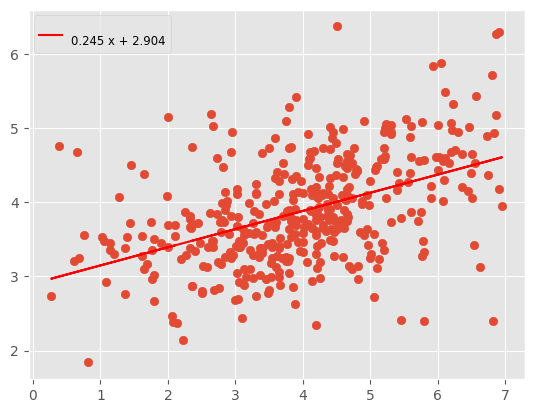

In [149]:
plt.scatter(ytest,y_predicted)
#calculate equation for regression line
z = np.polyfit(ytest,y_predicted, 1)
p = np.poly1d(z)
# Label with equation
print(p)
#add trendline to plot
plt.plot(ytest, p(ytest),'red',label="{}".format(p))
plt.legend(fontsize="small")
plt.show()

### Return the coefficient of determination of the prediction.

The coefficient of determination $R^2$ is defined as 
 $$ (1-\frac{u}{v}) $$ u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v
is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a 
$R^2 = 0.0 $

In [150]:
knn.score(Xtest, ytest) # knn score 0-1 

0.2089611232031625

### Final fancy plotting of select molecules
#### *Question 15* 
Use a part of a molecular name to see if it is included in the test data and then execute the code to examine structures. Structures will be default structures if rdkit is not available.

In [156]:
molecular_name = 'dimethyl'
predict_nn.where("protonated microstate ID",are.containing(molecular_name))

pKa,deprotonated microstate ID,protonated microstate ID,deprotonated microstate smiles,protonated microstate smiles,AM1BCC partial charge (prot. atom),AM1BCC partial charge (deprot. atom),AM1BCC partial charge (prot. atoms 1 bond away),AM1BCC partial charge (deprot. atoms 1 bond away),AM1BCC partial charge (prot. atoms 2 bond away),AM1BCC partial charge (deprot. atoms 2 bond away),∆G_solv (kJ/mol) (prot-deprot),SASA (Shrake),Bond Order,Change in Enthalpy (kJ/mol) (prot-deprot),num ionizable groups,pKa predict
3.54,"4-bromo-2,6-dimethyl-aniline_micro001","4-bromo-2,6-dimethyl-aniline_micro000",Cc1cc(cc(c1[NH-])C)Br,Cc1cc(cc(c1N)C)Br,-0.81874,-0.71757,0.15821,0.21805,-0.13873,-0.26877,-3.47696,8.37423,0.706583,0.521558,1,3.24702
4.73,"4-ethyl-3,6-dimethylpyridazine_micro001","4-ethyl-3,6-dimethylpyridazine_micro000",CCc1cc(nnc1C)C,CCc1cc([nH+]nc1C)C,0.09404,-0.30893,-0.19604,0.01746,0.0643425,-0.07974,-1.0005,11.0835,0.719598,0.72751,1,3.10303
3.57,"2-(2,5-dimethylphenyl)-2-hydroxy-acetic acid_micro001","2-(2,5-dimethylphenyl)-2-hydroxy-acetic acid_micro000",Cc1ccc(c(c1)[C@@H](C(=O)[O-])O)C,Cc1ccc(c(c1)[C@@H](C(=O)O)O)C,-0.59114,-0.82519,0.59824,0.90597,-0.19371,-0.393445,306.746,15.517,0.573998,3.55066,2,4.0134
3.35,"2,6-dimethylphenoxy-acetic acid_micro001","2,6-dimethylphenoxy-acetic acid_micro000",Cc1cccc(c1OCC(=O)[O-])C,Cc1cccc(c1OCC(=O)O)C,-0.61687,-0.82731,0.62561,0.92431,-0.21735,-0.41086,288.359,17.2411,0.570993,5.50296,1,3.30657
4.88,"cyclobutan-1,3-dicarboxlic acid-2,2-dimethyl_micro001","cyclobutan-1,3-dicarboxlic acid-2,2-dimethyl_micro000",CC1([C@@H](CC[C@H]1C(=O)[O-])C(=O)O)C,CC1([C@@H](CC[C@H]1C(=O)O)C(=O)O)C,-0.60944,-0.84489,0.64407,0.92,-0.332085,-0.511865,851.845,15.517,0.585849,1.17415,2,4.01302
3.758,"2,3-dimethyl-benzoic acid_micro001","2,3-dimethyl-benzoic acid_micro000",Cc1cccc(c1C)C(=O)[O-],Cc1cccc(c1C)C(=O)O,-0.6021,-0.82811,0.6528,0.90791,-0.332085,-0.458745,299.547,13.7928,0.584123,3.35685,1,3.88176
4.455,"3,4-dimethyl-benzoic acid_micro001","3,4-dimethyl-benzoic acid_micro000",Cc1ccc(cc1C)C(=O)[O-],Cc1ccc(cc1C)C(=O)O,-0.60878,-0.83453,0.65193,0.90537,-0.34846,-0.47884,287.168,16.0096,0.58293,2.31819,1,3.59411
3.2,2-(3.5-dimethylphenoxy)-acetic acid_micro001,2-(3.5-dimethylphenoxy)-acetic acid_micro000,Cc1cc(cc(c1)OCC(=O)[O-])C,Cc1cc(cc(c1)OCC(=O)O)C,-0.61838,-0.82433,0.62948,0.92154,-0.216595,-0.416245,293.494,16.9948,0.577124,3.79396,1,3.57904
4.5,"4,4'-Diamino-3,3'-dimethylbiphenyl_micro001","4,4'-Diamino-3,3'-dimethylbiphenyl_micro000",Cc1cc(ccc1N)c2ccc(c(c2)C)[NH-],Cc1cc(ccc1N)c2ccc(c(c2)C)N,-0.81508,-0.69979,0.13639,0.20235,-0.161055,-0.28302,6.52868,10.0983,0.7119,0.290166,2,3.63567
2.67,"N,N-dimethyl-4-trifluoromethylaniline_micro001","N,N-dimethyl-4-trifluoromethylaniline_micro000",CN(C)c1ccc(cc1)C(F)(F)F,C[NH+](C)c1ccc(cc1)C(F)(F)F,-0.55318,-0.75837,0.0494167,0.222357,-0.330855,-0.46326,2.8901,5.17232,0.697014,-3.14939,1,3.40015


In [152]:
check('tests/q15.py')

		Protonated 			Deprotonated


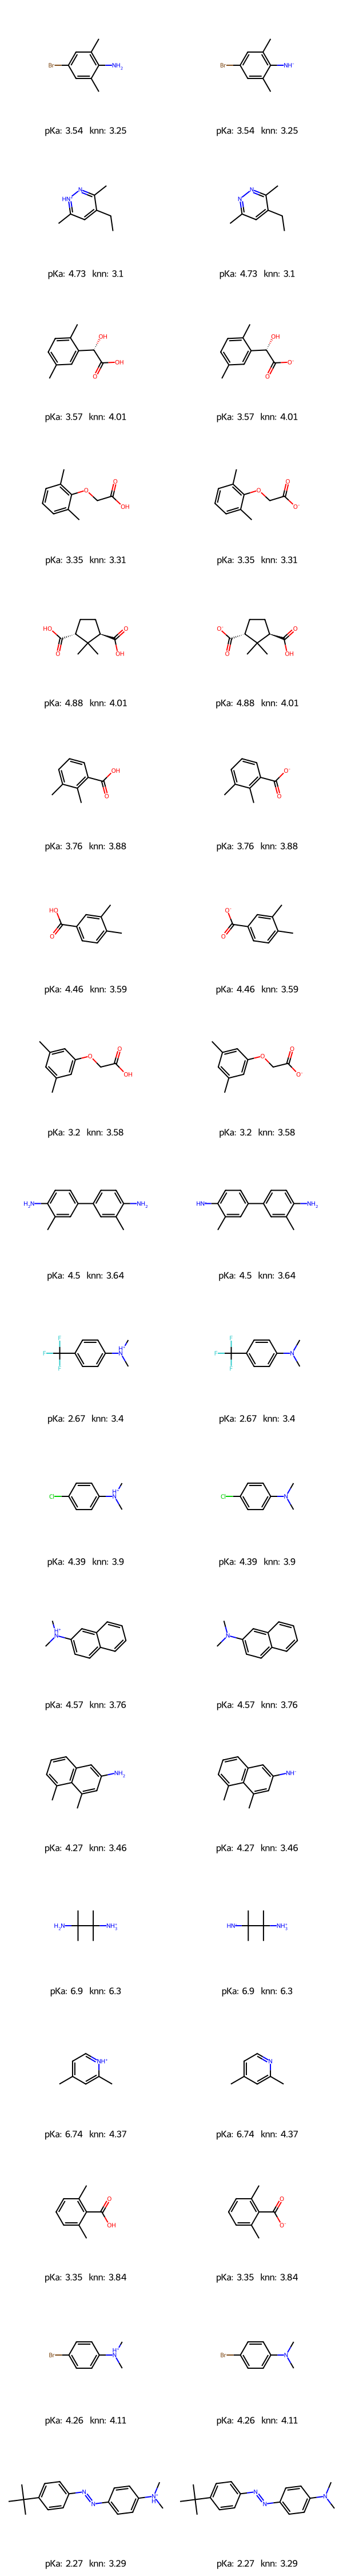

In [157]:
glycine=predict_nn.where("protonated microstate ID",are.containing(molecular_name))
mols = [Chem.MolFromSmiles(x) for x in glycine.column("protonated microstate smiles") if x is not None]
molde = [Chem.MolFromSmiles(x) for x in glycine.column("deprotonated microstate smiles") if x is not None]
mol = [None] * 2 * glycine.num_rows
mol[0::2]=mols
mol[1::2]=molde
label = [None] * 2 * glycine.num_rows
lpred = [None] * 2 * glycine.num_rows
exp = glycine.column("pKa")
pred = glycine.column("pKa predict")
label[0::2] = exp
label[1::2] = exp
lpred[0::2] = pred
lpred[1::2] = pred
for i,m in enumerate(mol):
    m.SetProp("Name","pKa: "+str(np.round(label[i],2))+"  knn: "+str(np.round(lpred[i],2)))

p = Draw.MolsToGridImage( [mol[x] for x in range(0,(2 * glycine.num_rows))] , legends=[x.GetProp("Name") for x in mol],molsPerRow=2,subImgSize=(300,250))
print("\t\tProtonated","\t\t\tDeprotonated")
p


## All finished...
Run checks and submit .html and .ipynb files after downloading.

In [160]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
checks = [1,2,3,4,6,7,8,11,12,13,14,15]
total = len(checks)
for x in checks:
    print('Testing question {}: '.format(str(x)))
    g = check('tests/q{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/total)))
print("Nice work ",Your_name)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)

Testing question 1: 
Passed
Testing question 2: 
Passed
Testing question 3: 
Passed
Testing question 4: 
Passed
Testing question 6: 
Passed
Testing question 7: 
Passed
Testing question 8: 
Passed
Testing question 11: 
Passed
Testing question 12: 
Passed
Testing question 13: 
Passed
Testing question 14: 
Passed
Testing question 15: 
Passed
Grade:  1.0
Nice work  ...
Submitted @  Wed Oct 23 20:05:51 2024
